In [62]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import MultipleLocator

In [63]:
ptrain = pd.read_csv('./Periodic/train.csv')
# Drop the time stamp column
ptest = pd.read_csv('./Periodic/test.csv')
#This is useless for rf
#ptrain= ptrain.loc[:, (ptrain != 0).any(axis=0)]

In [64]:
pX_train = ptrain.drop(["TimeStamp","ReadsAvg","WritesAvg","Unnamed: 0"],1)
pX_test = ptest.drop(["TimeStamp","ReadsAvg","WritesAvg","Unnamed: 0"],1)
pY_train_r = ptrain["ReadsAvg"]
pY_test_r = ptest["ReadsAvg"]

In [65]:
ftrain = pd.read_csv('./Flash/train.csv')
# Drop the time stamp column
ftest = pd.read_csv('./Flash/test.csv')
#ftrain= ftrain.loc[:, (ftrain != 0).any(axis=0)]

In [66]:
fX_train = ftrain.drop(["TimeStamp","ReadsAvg","WritesAvg","Unnamed: 0"],1)
fX_test = ftest.drop(["TimeStamp","ReadsAvg","WritesAvg","Unnamed: 0"],1)
fY_train_r = ftrain["ReadsAvg"]
fY_test_r = ftest["ReadsAvg"]

### Read files

In [67]:
#  Peridoc Pearson correlation
ptb = pd.read_csv('./Periodic/read_t_b.csv')
ptb_f= ptb.iloc[0:,0].tolist()
pX_train_tb=pX_train[ptb_f]
pX_test_tb=pX_test[ptb_f]
ptb_nmae=[]
ptb_time=[]

#  Flash Pearson correlation
ftb = pd.read_csv('./Flash/read_t_b.csv')
ftb_f= ftb.iloc[0:,0].tolist()
fX_train_tb=fX_train[ftb_f]
fX_test_tb=fX_test[ftb_f]
ftb_nmae=[]
ftb_time=[]

In [68]:
##### Integreted List

In [69]:
itb_f = list(set(ptb_f).intersection(ftb_f))
#itb_f = list(set(ftb_f).intersection(ptb_f))
# no difference between these 2 methods

In [70]:
itb_f.sort(key= lambda x: ptb_f.index(x)+ftb_f.index(x))

In [47]:
ipX_train_tb=pX_train[itb_f]
ipX_test_tb=pX_test[itb_f]
iptb_nmae=[]
iptb_time=[]

In [48]:
ifX_train_tb=fX_train[itb_f]
ifX_test_tb=fX_test[itb_f]
iftb_nmae=[]
iftb_time=[]

### Testing

In [49]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

In [50]:
def fit_RF_reg(X,Y,X_test,Y_test):
    start_time = time.time()
    
    rfr = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 10,verbose = 0)
    rfr.fit(X, Y)
    
    end_time = time.time()
    timec=end_time - start_time

    NMAE=np.mean(np.abs(rfr.predict(X_test) - Y_test))/np.mean(Y_test)
    #R_squared = model_k.score(X,Y)
    return NMAE, timec

In [51]:
def RF_training_f(klist,X_train_f,Y_train_r,X_test_f,Y_test_r,nmae,training_t):
    for k in klist:    
        error,timec = fit_RF_reg(X_train_f.iloc[:,0:k],Y_train_r,X_test_f.iloc[:,0:k],Y_test_r)
        nmae.append(error)
        training_t.append(timec)

In [71]:
#klist=[1, 2, 4,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]
klist=[]
for k in range(1,8):
    klist.append(2**k)

In [72]:
ptb_nmae=[]
ptb_time=[]
RF_training_f(klist,pX_train_tb,pY_train_r,pX_test_tb,
              pY_test_r,ptb_nmae,ptb_time)

In [73]:
ftb_nmae=[]
ftb_time=[]
RF_training_f(klist,fX_train_tb,fY_train_r,fX_test_tb,
              fY_test_r,ftb_nmae,ftb_time)

In [74]:
iptb_nmae=[]
iptb_time=[]
RF_training_f(klist,ipX_train_tb,pY_train_r,ipX_test_tb,
              pY_test_r,iptb_nmae,iptb_time)

In [75]:
iftb_nmae=[]
iftb_time=[]
RF_training_f(klist,ifX_train_tb,fY_train_r,ifX_test_tb,
              fY_test_r,iftb_nmae,iftb_time)

### Plot

<ipython-input-82-d17b8209dc59>:38: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_xscale("log",basex=2)


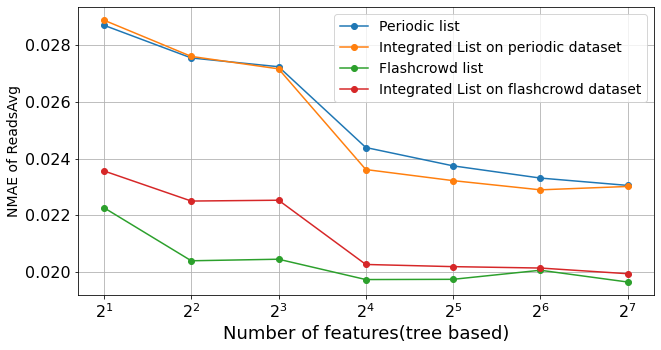

In [82]:
#a=[1, 2,3, 4, 5,6,7,8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30,     32,40,48,56,64,  96,128,192,256,512,1024]
#a = [0,1,3,7,9,11,15,19,21,23,24,25,26,27,28,29]

def sortindex(list,indexs):
    _ = []
    for a in indexs:
        _.append(list[a])
    return _

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,ptb_nmae,marker='o')
plt.plot(klist,iptb_nmae,marker='o')
plt.plot(klist,ftb_nmae,marker='o')
plt.plot(klist,iftb_nmae,marker='o')
# plt.plot(klist,r_arr_nmae,marker='o')
# plt.plot(klist,r_tba_nmae,marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_tb_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_tb_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_arr_nmae,a),marker='o')
#plt.plot(sortindex(klist,a),sortindex(r_tba_nmae,a),marker='o')


font_size=18
plt.xlabel('Number of features(tree based)', fontsize=font_size)
plt.ylabel('NMAE of ReadsAvg', fontsize=font_size-4)
plt.legend(('Periodic list','Integrated List on periodic dataset','Flashcrowd list','Integrated List on flashcrowd dataset' ), 
           loc=1, shadow=False, fancybox=True, fontsize=font_size-4)
#  bbox_to_anchor=(1.01,1.0), borderaxespad = 0.,
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

#x_major_locator=MultipleLocator(8)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)

ax.set_xscale("log",basex=2)
#ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
#ax.set_ylim(0.021, 0.035)
plt.grid()
plt.savefig("./Fig/tb_i_compare.png",dpi=300,bbox_inches='tight')

In [ ]:
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_tb_time,marker='o')
plt.plot(klist,r_tb_time,marker='o')
plt.plot(klist,r_arr_time,marker='o')
plt.plot(klist,r_tba_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time (s)', fontsize=font_size-2)
plt.legend(('Univariate','Tree-based',
            'ARR','tbA'), loc = 2, shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
#ax.xaxis.set_major_locator(x_major_locator)
#ax.set_xscale("log",basex=2)
#ax.set_yscale("log",basey=2)
#ax.set_xticks([1,2,4,8,16,32,64,128,256,512,1024])
ax.set_xlim(0,200)
ax.set_ylim(0,6)

plt.grid()
plt.savefig("./Fig/periodic_time1.png",dpi=300,bbox_inches='tight')

In [114]:
y = np.sqrt(klist)/5 
y2 = [_**(0.3)-1.9 for _ in klist]
from matplotlib.pyplot import MultipleLocator
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax = fig.add_axes([0, 0, 1, 1]) 
#my_xticks=list(range(1, 13))
plt.plot(klist,r_tb_time,marker='o')
#plt.plot(klist,y,marker='o')
plt.plot(klist,y2,marker='o')
# plt.plot(klist,r_tb_time,marker='o')
# plt.plot(klist,r_arr_time,marker='o')
# plt.plot(klist,r_tba_time,marker='o')
font_size=18
plt.xlabel('Number of features', fontsize=font_size)
plt.ylabel('Training time (s)', fontsize=font_size-2)
#plt.legend(('Univariate','Tree-based',
#            'ARR','tbA'), loc = 2, shadow=False, fancybox=True, fontsize=font_size-4)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)

x_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xscale("log",basex=2)
ax.set_yscale("log",basey=2)
plt.grid()
#plt.savefig("./Fig/periodic_time.png",dpi=300,bbox_inches='tight')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
